# Лабораторная работа 4 — Кластеризация (Вариант 4)

Набор данных: `bank_loan_default.csv` (вариант 4).

**Цель:** изучение алгоритмов и методов кластеризации на практике.

## Часть 1

1.1-1.2 Использование функции для создания набора данных и ее применение

Был создан синтетический набор данных из 180 записей с двумя признаками (x, y). Использование фиксированных параметров (n=60, seed=50) гарантирует воспроизводимость эксперимента и имитирует данные, которые, как известно, содержат три четко разделенных кластера.


In [322]:
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

# Создание набора данных
n = 60
seed = 50
df = make_data(n, seed)
display(df)

,x,y
72,107.187558,4.034787
71,119.440124,4.532164
17,79.755409,2.043917
49,36.642879,0.277642
29,73.806134,0.214540
...,...,...
34,75.070434,2.260831
174,152.955918,1.276600
120,139.566982,1.741122
87,126.644266,4.900715


1.3-1.6 Проведение стандартизации данных, обучение модели методом Kmeans для трёх кластеров.
Выполнение предсказания. Получение меток кластеров. Подсчет коэффициента силуэта, проведение визуализации

Была проведена стандартизация через StandrdScaler, которая стандартизирует все данные, т. е. делает так, чтобы их мат ожидание было равно 0, а стандартное отклонение равно 1.

 Для этого из исходного значения признака вычитается среднее, и эта разность делится на стандартное отклонение. Таким образом, данные имеют вид стандартного
нормального распределения, что позволяет минимизировать среднеквадратичную ошибку.

Это нужно чтобы все признаки (колонки) в наборе данных вносили одинаковый вклад в процесс обучения модели, независимо от их исходного масштаба

Далее проводится обучение модели K-Means при k=3, расчёт коэффициента силуэта и визуализация полученных групп. Эти шаги позволяют оценить качество кластеризации как количественно (через метрики), так и визуально (через графики распределения).

Коэффициент силуэта (k=3): 0.7064884491129337


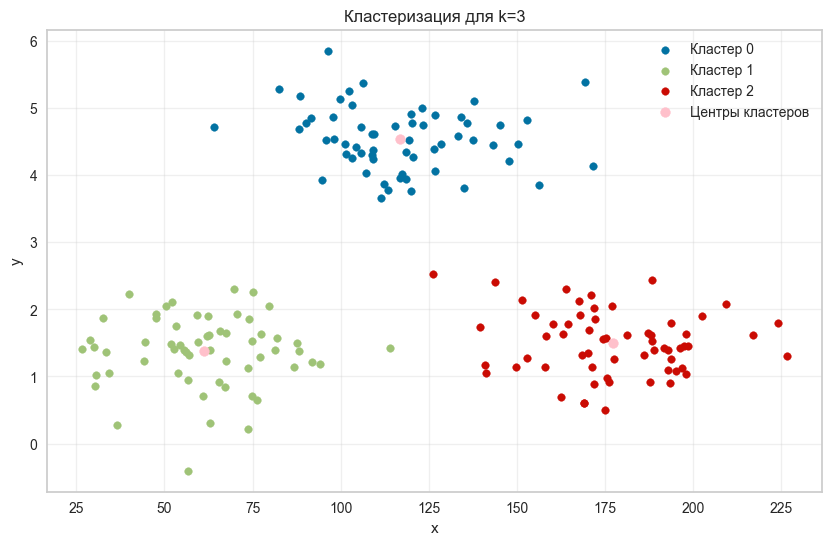

In [323]:
scaler = StandardScaler()
# Стандартизация данных
X_scaled = scaler.fit_transform(df[['x','y']])

# Инициализация модели K-Means с заданным количеством кластеров (k=3)
km3 = KMeans(n_clusters=3, random_state=seed)
# Обучение модели
labels3 = km3.fit_predict(X_scaled)

# Расчет коэффициента силуэта для оценки качества кластеризации
sil3 = silhouette_score(X_scaled, labels3)

# Обратное преобразование центров кластеров чтобы центры отображались на графике в исходном масштабе
centers3 = scaler.inverse_transform(km3.cluster_centers_)
print('Коэффициент силуэта (k=3):', sil3)

# Визуализация результатов кластеризации 
plt.figure(figsize=(10,6))

# Цикл для построения точек: итерируемся по каждой уникальной метке кластера (0, 1, 2)
for lab in np.unique(labels3):
    plt.scatter(df['x'].values[labels3==lab], df['y'].values[labels3==lab], s=30, label=f'Кластер {lab}')
# Построение центров кластеров (красные точки)
plt.scatter(centers3[:,0], centers3[:,1], label='Центры кластеров', color='pink')

plt.title(f'Кластеризация для k=3')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()


1.7 Повторение пунктов 1.4-1.6 для n_clusters = 2 и n_clusters = 4

Пункты 1.4-1.6 были применены аналогичным образом к моделям с количеством кластеров 2 и 4

Коэффициент силуэта (k=2): 0.4910057743109459


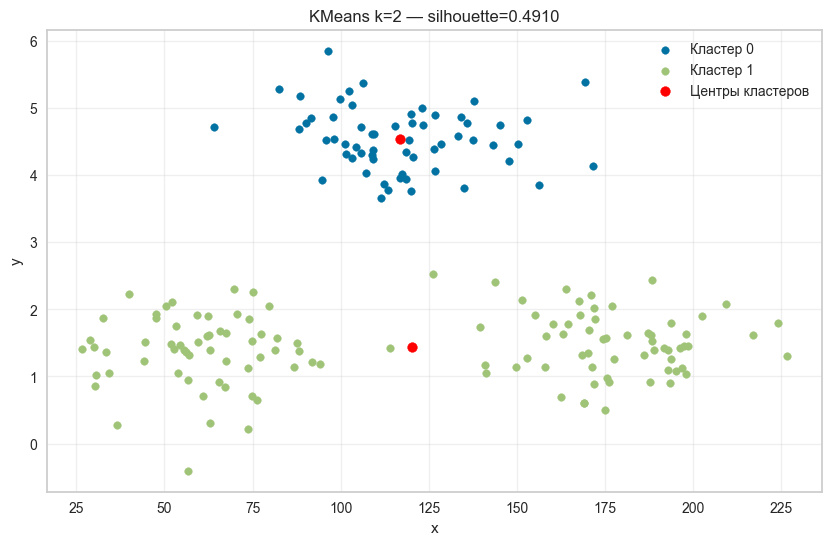

Коэффициент силуэта (k=4): 0.5726194203807988


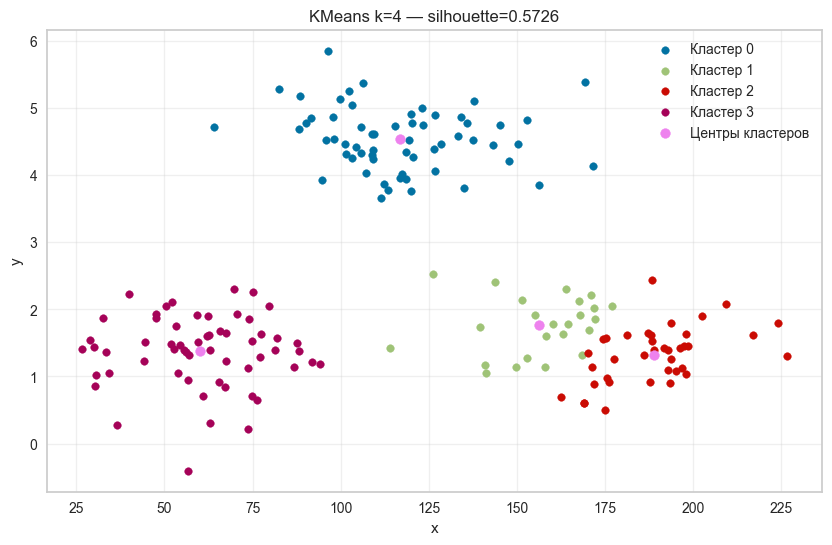

In [324]:
# k=2
km2 = KMeans(n_clusters=2, random_state=seed, n_init=10)
labels2 = km2.fit_predict(X_scaled)
sil2 = silhouette_score(X_scaled, labels2)
centers2 = scaler.inverse_transform(km2.cluster_centers_)
print('Коэффициент силуэта (k=2):', sil2)
plt.figure(figsize=(10,6))
for lab in np.unique(labels2):
    plt.scatter(df['x'].values[labels2==lab], df['y'].values[labels2==lab], s=30, label=f'Кластер {lab}')
plt.scatter(centers2[:,0], centers2[:,1], color='red', label='Центры кластеров')
plt.title(f'KMeans k=2 — silhouette={sil2:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

# k=4
km4 = KMeans(n_clusters=4, random_state=seed, n_init=10)
labels4 = km4.fit_predict(X_scaled)
sil4 = silhouette_score(X_scaled, labels4)
centers4 = scaler.inverse_transform(km4.cluster_centers_)
print('Коэффициент силуэта (k=4):', sil4)
plt.figure(figsize=(10,6))
for lab in np.unique(labels4):
    plt.scatter(df['x'].values[labels4==lab], df['y'].values[labels4==lab], s=30, label=f'Кластер {lab}')
plt.scatter(centers4[:,0], centers4[:,1], color='violet', label='Центры кластеров')
plt.title(f'KMeans k=4 — silhouette={sil4:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

### Сравнение результатов лкастеризации с разныи количеством кластеров

- При k=2 данные делятся на крупные, более общие группы. Такой вариант может использоваться для грубой сегментации. 
При увеличении числа кластеров до k=4 разбиение становится более детальным: внутри больших групп выделяются подструктуры. 
Однако рост числа кластеров также повышает вероятность пересечений и ухудшения качества силуэта. Оптимальный баланс наблюдается при k=3.


- По полученным графикам и коэффициентам силуэтов можно сделать вывод о том, что для этих данных лучше всего использовать кластеризацию с k=3, тут и коэффициент силуэта выше и на графиках видно, что даже визуально лучше всего было бы разделить точки на 3 кластера
- На графике с 2 кластерами видно, что два нижних было бы логичнее разделить, они находятся слишком далеко, поэтому такое число кластеров не подходит, а на графике с 4 кластерами видно, что в целом оранжевый и зеленый кластеры можно объединить в один, потому что основная масса точек находится довольно близко друг к другу

1.8 Построение графика по методу локтя

Суть метода заключается в том, чтобы найти точку на графике, где изменение суммы квадратов
расстояний между точками и центроидами кластеров перестает значительно меняться. Эта точка соответствует оптимальному количеству кластеров. В данном случае это число равно 3, что подтверждает сделанные ранее выводы

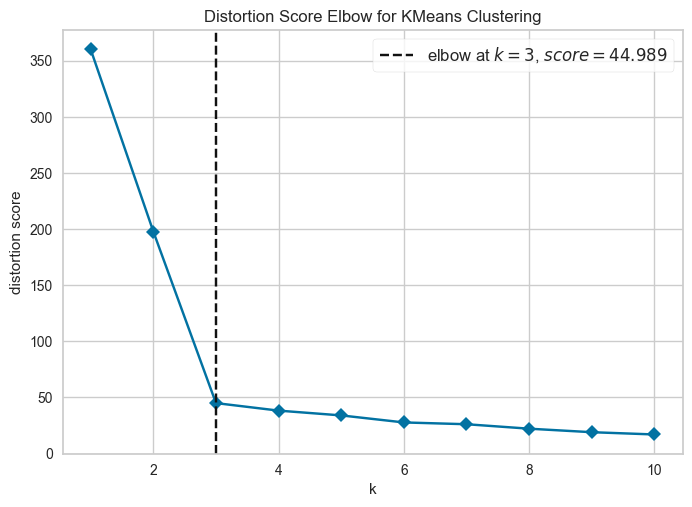

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [325]:
# Построение графика по "методу локтя"
visualizer = KElbowVisualizer(km3, k=(1,11), timings=False)
visualizer.fit(X_scaled)
visualizer.show()

- В результате построения графика по "методу локтя" можно сделать вывод о том, что вышеизложенное предположение о том, что оптимальное количество кластеров для полученных данных равно трем подтвердилось. 
- Увеличение количества кластеров после трех уже является неэффективным, как и уменьшение. Локоть четко виден, данные имеют 3 естественных кластера

## Часть 2

2.1 Загрузка набора данных

Набор данных о кредитном риске загружен. Он включает 3041 запись с 10 признаками, охватывающими демографические, финансовые и кредитные характеристики заемщиков, а также целевую переменную Default.

In [326]:
# Загрузка и первичный осмотр данных
df = pd.read_csv("bank_loan_default.csv")
print("Размер датасета:", df.shape)
df.head()

Размер датасета: (3041, 12)


,age,annual_income,employment_type,education,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,delinquency_30d,residence_type,Default
0,42,57272.0,Self-Employed,Masters,8516.0,5.85,48,730.0,10,No,Own,0
1,51,45786.0,Salaried,Masters,13760.0,9.97,36,677.0,7,No,Mortgage,0
2,69,42359.0,Salaried,Bachelors,2569.0,13.75,48,624.0,2,No,Own,0
3,65,50709.0,Self-Employed,Masters,13204.0,8.70,48,698.0,3,No,Rent,0
4,30,46272.0,Salaried,HS,7700.0,7.53,48,532.0,7,No,Rent,0


Датасет содержит 3041 запись с информацией с данными о кредитах:
- age — возраст заёмщика (лет), числовой.
- annual_income — годовой доход, USD/год, числовой (широкий диапазон).
- employment_type — тип занятости: Salaried / Self-Employed / Unemployed, категориальный.
- education — образование: HS / Bachelors / Masters / PhD, категориальный.
- loan_amount — сумма кредита, USD, числовой (широкий диапазон).
- interest_rate_pct — процентная ставка по кредиту, % годовых, числовой.
- term_months — срок кредита, месяцев (набор фиксированных значений:24/36/48/60/72), числовой/категориальный.
- credit_score — кредитный скор (от 300 до 850), числовой.
- num_open_accounts — число открытых кредитных счетов, целочисленный счётчик.
- delinquency_30d — просрочка платежа 30 дней: Yes / No, категориальный.
- residence_type — жильё: Own / Rent / Mortgage, категориальный.
- Default — целевой класс: 1 — дефолт по кредиту, 0 — нет

2.2 Предобработка данных

Первичный анализ данных, позволяющий понять структуру набора: количество признаков и наблюдений, типы данных и возможные проблемы. Такой анализ необходим, чтобы убедиться в корректности данных и определить необходимость последующей предобработки — масштабирования, очистки или удаления выбросов.

In [327]:
display(df.info())
display(df.describe())
display(df['employment_type'].value_counts())
display(df['education'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3041 non-null   int64  
 1   annual_income      3041 non-null   float64
 2   employment_type    3041 non-null   object 
 3   education          3041 non-null   object 
 4   loan_amount        3041 non-null   float64
 5   interest_rate_pct  3041 non-null   float64
 6   term_months        3041 non-null   int64  
 7   credit_score       3041 non-null   float64
 8   num_open_accounts  3041 non-null   int64  
 9   delinquency_30d    3041 non-null   object 
 10  residence_type     3041 non-null   object 
 11  Default            3041 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 285.2+ KB


None

,age,annual_income,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,Default
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000
mean,47.088787,45746.182835,10683.309306,9.436271,47.696153,681.263400,4.545873,0.203880
std,15.600123,23572.506169,7384.866768,3.523466,13.883245,73.007065,2.175964,0.402947
min,21.000000,7433.000000,1016.000000,1.900000,24.000000,417.000000,0.000000,0.000000
25%,34.000000,28741.000000,5540.000000,7.150000,36.000000,632.000000,3.000000,0.000000
50%,47.000000,40826.000000,8797.000000,9.300000,48.000000,683.000000,4.000000,0.000000
75%,60.000000,57428.000000,13464.000000,11.440000,60.000000,733.000000,6.000000,0.000000
max,74.000000,237129.000000,69139.000000,33.888000,72.000000,850.000000,14.000000,1.000000


employment_type
Salaried         2132
Self-Employed     682
Unemployed        227
Name: count, dtype: int64

education
Bachelors    1181
HS            956
Masters       748
PhD           156
Name: count, dtype: int64

Данные в этом датасете не имеют пропусков, неявных дубликатов или каких-то нерелаистичных выбросов (например возраста в 120 лет)

2.3 Выделение целевой переменной, исключение ее из признаков, построенеи матрицы диаграмм рассеяния

В качестве целевой переменной была выделена переменная Default: 1 — дефолт по кредиту, 0 — нет.

Переменная Default была исключена из признаков кластеризации, поскольку это задача обучения без учителя. Она будет использована далее для интерпретации кластеров по уровню риска. Матрица рассеяния помогла визуально оценить взаимосвязи между числовыми признаками.

<Figure size 1000x1000 with 0 Axes>

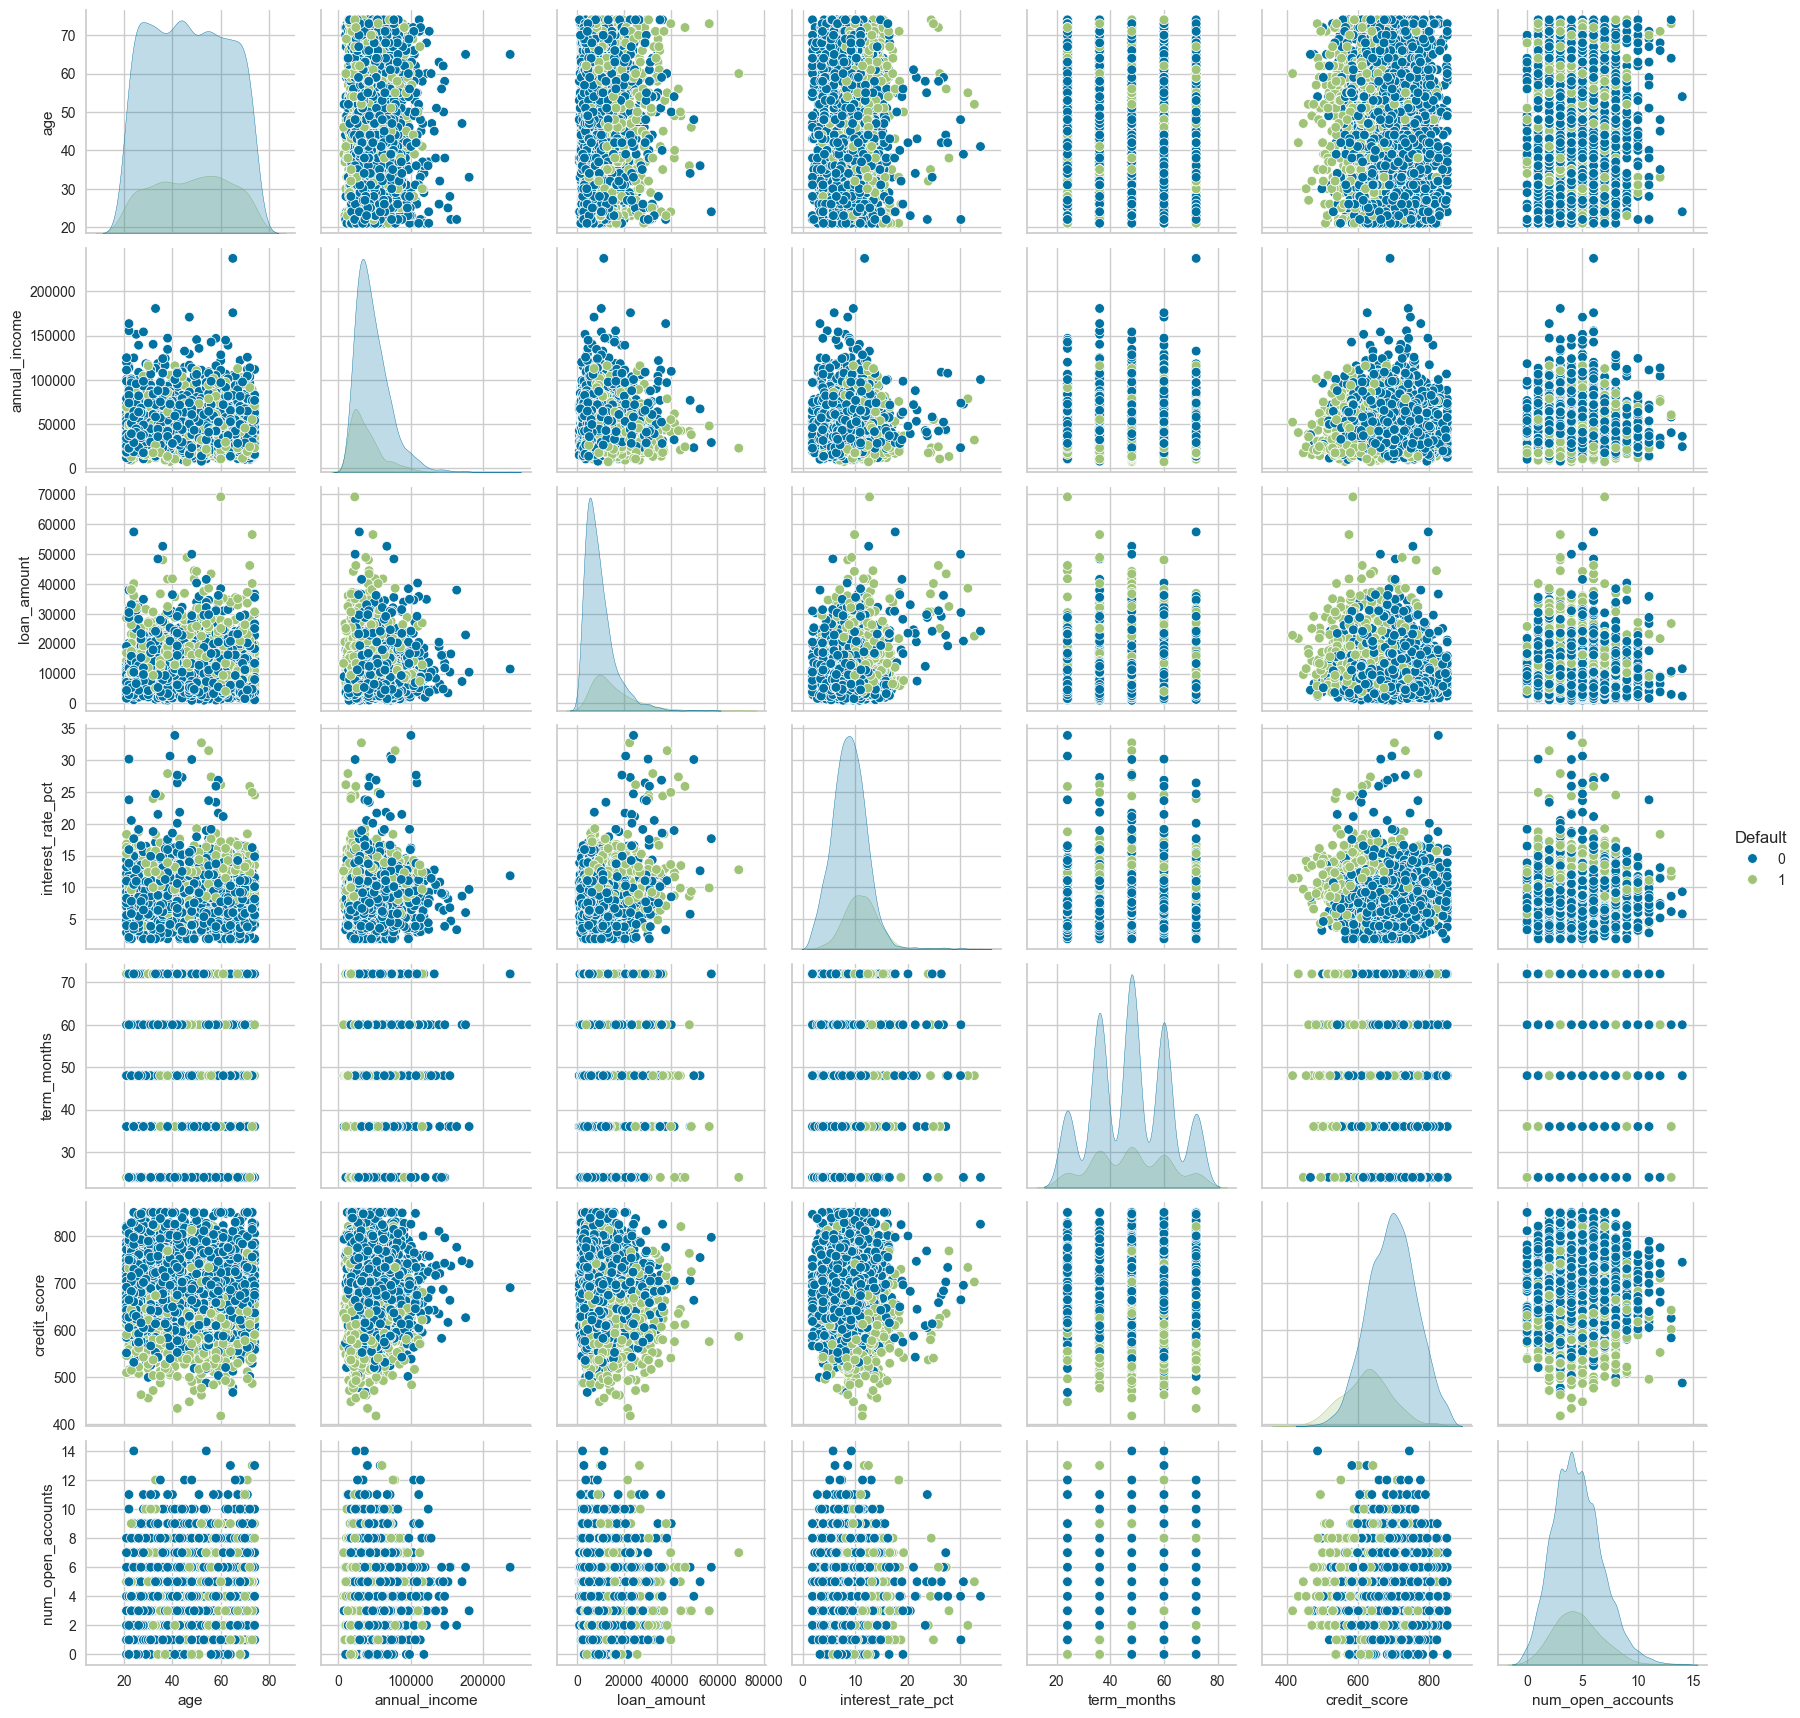

In [328]:
# Предобработка
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# Целевая переменная — Default (исключаем из признаков)
target_col = "Default"
y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()
# Выделение числовых признаков
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()


# Матрица диаграмм рассеяния для числовых признаков, выделяя Default цветом
plt.figure(figsize=(10,10))
sns.pairplot(df, vars=num_cols, hue='Default')
plt.show()


По полученным диаграммам можно сделать следующие выводы:
- Чаще всего дефолт происходит у людей с низким кредитным рейтнгом, с высокими процентными ставками по кредиту и с высокой суммой по кредиту
- Чаще дефолт по кредиту происходит у людей, которые берут более длительные кредиты (больше чем на 36 месяцев)
- Чаще всего дефолт происходит у людей с низким доходом, что является логичным
- С возрастом корреляция не столь сильна, заметно лишь, что у более старшего поколения показатель дефолтов выше
- С числом открытых кредитных счетов корреляции тоже почти нет

2.4 Стандартизация числовых данных

Стандартизация была выполнена для всего набора признаков (например, для таких сильно различающихся по масштабу, как annual_income и num_open_accounts). Это предотвратило доминирование признаков с большим разбросом в расчете евклидова расстояния K-Means.

Также была проведена нормализация категориальных данных для того, чтобы их тоже можно было использовать при анализе

In [329]:
# Стандартизация числовых данных
new_scaler = StandardScaler()
X_prepared = new_scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(X_prepared, columns=num_cols)
# Нормализация категориальных данных
df_encoded = pd.get_dummies(df[cat_cols], prefix=cat_cols)
# Конкатенация
X_final = pd.concat([df_scaled, df_encoded], axis=1)
display(X_final)
new_df = X_final.copy()

,age,annual_income,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,employment_type_Salaried,employment_type_Self-Employed,employment_type_Unemployed,education_Bachelors,education_HS,education_Masters,education_PhD,delinquency_30d_No,delinquency_30d_Yes,residence_type_Mortgage,residence_type_Own,residence_type_Rent
0,-0.326255,0.489032,-0.293528,-1.017992,0.021890,0.667670,2.506946,False,True,False,False,False,True,False,True,False,False,True,False
1,0.250758,0.001689,0.416690,0.151503,-0.842604,-0.058407,1.128020,True,False,False,False,False,True,False,True,False,True,False,False
2,1.404785,-0.143716,-1.098956,1.224487,0.021890,-0.784483,-1.170190,True,False,False,True,False,False,False,True,False,False,True,False
3,1.148335,0.210569,0.341388,-0.208996,0.021890,0.229284,-0.710548,False,True,False,False,False,True,False,True,False,False,False,True
4,-1.095607,0.022310,-0.404042,-0.541110,0.021890,-2.044842,1.128020,True,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,-1.287944,-0.372876,1.720814,2.017586,-1.707097,-0.907779,0.668378,True,False,False,False,True,False,False,True,False,False,True,False
3037,1.661235,0.396197,3.987659,4.397453,-0.842604,-1.935246,-1.629832,True,False,False,True,False,False,False,True,False,False,False,True
3038,0.507208,-0.204644,2.576244,4.029573,0.886383,1.188253,0.208736,True,False,False,False,False,True,False,True,False,True,False,False
3039,-0.903269,0.523442,1.823012,4.329327,1.750876,-0.935178,0.208736,True,False,False,False,True,False,False,True,False,False,False,True


2.5 Кластеризация объектов методом k-means. Подбор оптимального количества кластеров. 

Оптимальное количество кластеров было подобрано с помощью KElbowVisualizer, оптимальным количеством кластеров по графику методом локтя является 6 кластеров


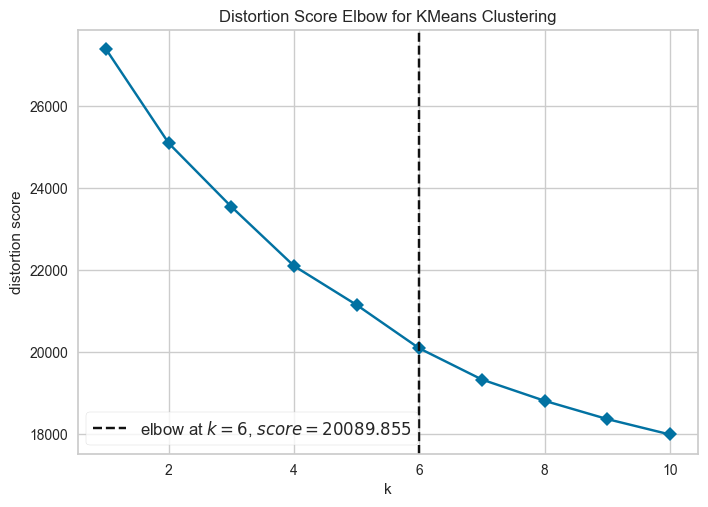

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [330]:
model = KMeans(random_state=50)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(new_df)
visualizer.show()

2.6 Определение объектов, относящихся к одному кластеру. Подсчет средних показателей по каждому признаку каждого кластера.

Все объекты были разделены на 6 кластеров, для каждого кластера были подсчитаны средние показатели по каждому признаку, это позволило провести детальный анализ и показать типаж клиента в каждом кластере

In [331]:
OPTIMAL_K = 6

# Обучение K-Means модели
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=50)
cluster_labels_kmeans = kmeans.fit_predict(new_df)

df_clear = df.copy()
df_clear['cluster_kmeans'] = cluster_labels_kmeans

# Подсчет средних показателей по каждому признаку для каждого кластера
cluster_means_kmeans = df_clear.groupby('cluster_kmeans').mean(numeric_only=True)

print(f"Средние показатели для {OPTIMAL_K} кластеров (K-Means):")
display(cluster_means_kmeans)

# Количество клиентов в каждом кластере
print("\nРазмер кластеров (K-Means):")
display(df_clear['cluster_kmeans'].value_counts())

Средние показатели для 6 кластеров (K-Means):


,age,annual_income,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,Default
cluster_kmeans,,,,,,,,
0,48.675159,41190.175159,25765.210828,12.593662,48.573248,638.522293,4.232484,0.611465
1,47.959654,91408.662824,10098.331988,9.100767,51.077810,682.832853,4.489914,0.144092
2,35.138564,40342.383973,8717.135225,8.917429,35.979967,658.350584,3.607679,0.196995
3,52.125000,40523.910714,9356.959127,8.841758,41.642857,690.718254,7.551587,0.168651
4,35.212375,38709.309365,8640.222074,9.704579,60.220736,707.367893,4.347826,0.147157
5,63.173785,39358.343152,8526.100147,8.810309,49.360825,690.431517,3.490427,0.128130



Размер кластеров (K-Means):


cluster_kmeans
5    679
2    599
4    598
3    504
1    347
0    314
Name: count, dtype: int64

Выводы о первом кластере:
- Самый рискованный с уровнем дефолта в 61.1% (очень высокий)
- Ключевые особенности: самый низкий кредитный рейтинг (638.5), самые большие суммы кредита (loan_amount - 25.8k), самая высокая процентная ставка (interest_rate_pct - 12.6%). При этом доход (41.2k) ненамного выше других "небогатых" кластеров.
- Этот кластер представляет собой группу клиентов, которые берут крупные займы, имея плохую кредитную историю, и с огромной вероятностью (более 60%) не возвращают долг. Банку следует избегать выдачи крупных кредитов клиентам с таким профилем.

Выводы о втором кластере:
- Кластер с состоятельными клиентами с уровнем дефолта в 14.4% (довольно низкий)
- Ключевые особенности: Этот кластер выделяется самым высоким годовым доходом (annual_income - 91.4k), который более чем в два раза превышает средний доход других групп. Несмотря на не самый лучший кредитный рейтинг (682.8), их высокий доход делает их очень надежными заемщиками.
- Это отличные клиенты. Их высокий доход позволяет им без проблем обслуживать умеренные кредиты, что приводит к низкому уровню дефолтов.

Выводы о третьем кластере:
- Кластер с молодыми и рискованными клиентами с уровнем дефолта в 19.7% (Выше среднего)
- Ключевые особенности: Это самая молодая группа (средний возраст 35.1 лет). Они берут небольшие кредиты (loan_amount - 8.7k) на самый короткий срок (term_months - 36). У них относительно низкий кредитный рейтинг (658.4) и низкий доход.
- Скорее всего это молодые клиенты, берущие небольшие, "быстрые" кредиты. Их уровень дефолта выше среднего, что может быть связано с более низкой финансовой стабильностью в этом возрасте.

Выводы о четвертом кластере:
- Это кластер с опытными заемщиками с уровнем дефолта в 16.9% (Средний уровень)
- Ключевые особенности: У этого кластера самое большое количество открытых счетов (num_open_accounts - 7.6), что говорит о богатой кредитной истории. У них хороший кредитный рейтинг (690.7), низкая процентная ставка и средний возраст (52.1).
- Это финансово активные клиенты, которые умеют пользоваться кредитными продуктами. У них хороший кредитный рейтинг и средний уровень риска.

Выводы о пятом кластере:
- Это кластер с молодыми и надежными клиентами с уровнем дефолта в 14.7% (низкий уровень)
- Ключевые особенности: Они такие же молодые, как и Кластер 2 (возраст 35.2), но имеют самый высокий кредитный рейтинг (707.4) из всех групп. Они берут небольшие кредиты, но на самый длинный срок (60.2 месяца).
- Это идеальные молодые клиенты. Высокий кредитный рейтинг делает их очень надежными, несмотря на низкий доход и молодой возраст. Они предпочитают растягивать платежи на долгий срок.

Выводы о шестом кластере:
- Это кластер с пожилыми и стабильными клиентами с уровнем дефолта в 12.8% (Самый низкий)
- Ключевые особенности: Это самый старший кластер (средний возраст 63.2 года). У них низкий доход (39.4k), что, вероятно, соответствует пенсии. У них хороший кредитный рейтинг (690.4) и низкое число открытых счетов.
- Это самые надежные заемщики. Несмотря на низкий доход, их стабильность и наличие активов делают их наименее рискованной группой для банка.



2.7 Вычисление метрик качества

Были посчитаны как внешние метрики качества: Коэффициент силуэта, так и внутренние, такие как ARI, AMI, Homogenity Completness и V-мера, по полученным значениям можно сделать вывод о том, что модель плохо справилась с задачей разделения на кластеры, они перекрываются между собой и в каждом кластере есть клиенты сильно похожие на другие кластеры

In [332]:
from sklearn.metrics import (adjusted_rand_score, homogeneity_score, completeness_score, 
							 v_measure_score, adjusted_mutual_info_score)

# 1. Внутренняя метрика (на масштабированных данных)
silhouette_kmeans = silhouette_score(new_df, cluster_labels_kmeans)
print(f"K-Means | Коэффициент силуэта: {silhouette_kmeans:.4f}")

# 2. Внешние метрики (сравнение с y = df['Default'])
ari_kmeans = adjusted_rand_score(y, cluster_labels_kmeans)
homo_kmeans = homogeneity_score(y, cluster_labels_kmeans)
comp_kmeans = completeness_score(y, cluster_labels_kmeans)
v_kmeans = v_measure_score(y, cluster_labels_kmeans)
ami_kmeans = adjusted_mutual_info_score(y, cluster_labels_kmeans)


print(f"K-Means | ARI: {ari_kmeans:.4f}")
print(f"K-Means | AMI: {ami_kmeans:.4f}")
print(f"K-Means | Homogeneity: {homo_kmeans:.4f}, Completeness: {comp_kmeans:.4f}, V-Мера: {v_kmeans:.4f}")

K-Means | Коэффициент силуэта: 0.0751
K-Means | ARI: 0.0286
K-Means | AMI: 0.0428
K-Means | Homogeneity: 0.0972, Completeness: 0.0280, V-Мера: 0.0435


#### Выводы по метрикам:
- Коэффициент силуэта: 0.0751, это очень низкий показатель (близкий к 0). Идеальный диапазон - ближе к 1.
- Кластеры сильно перекрываются. Объекты на границах кластеров находятся так же "далеко" от своего центра, как и от центра соседнего кластера. Геометрически эти 6 групп не являются четкими "островами" в данных, а, скорее, представляют собой смешанное облако точек.
##### Внешние метрики: 
- ARI (Adjusted Rand Index): 0.0286, AMI (Adjusted Mutual Information): 0.0428, V-Мера (V-Measure): 0.0435
- Все эти метрики катастрофически близки к 0. Значение 0 означает, что результат кластеризации ничем не лучше случайного "раскидывания" клиентов по группам.
- Структура, которую нашел K-Means (например, "Молодые", "Богатые", "Пожилые"), почти никак не связана со структурой "Надежный клиент" или "Клиент с дефолтами".

- Homogeneity (Однородность): 0.0972. Показывает "Состоят ли кластеры из объектов только одного класса?" (Например, в Кластере 0 только дефолтники?). Вывод: Нет. Это значение очень низкое. Кластеры получились"грязные" — в каждом из них есть и надежные, и клиенты с дефолтами.
- Completeness (Полнота): 0.0280. Показывает "Попали ли все объекты одного класса в один кластер?" (Например, все дефолтники собрались в Кластере 0?). Вывод: Нет, это значение еще ниже. Это означает, что реальные дефолтные клиенты "размазаны" по всем 6 кластерам. Модель не смогла их сгруппировать.

2.8 Выполнение кластеризации иерархическим агломеративным методом. Построение дендрограммы. Подсчет средних показателей по каждому
признаку каждого кластера. Вычисление нескольких метрик качества

Была выполнена кластеризация иерархическим агломеративным методом, построена дендрограмма, подсчитаны средние показатели по каждому признаку каждого кластера, вычислены различные метрики качества: Коэффициент силуэта, ARI, AMI, Homogenity Completness и V-мера. По построенной дендрограмме можно сделать вывод что оптимальным количеством кластеров будет 4

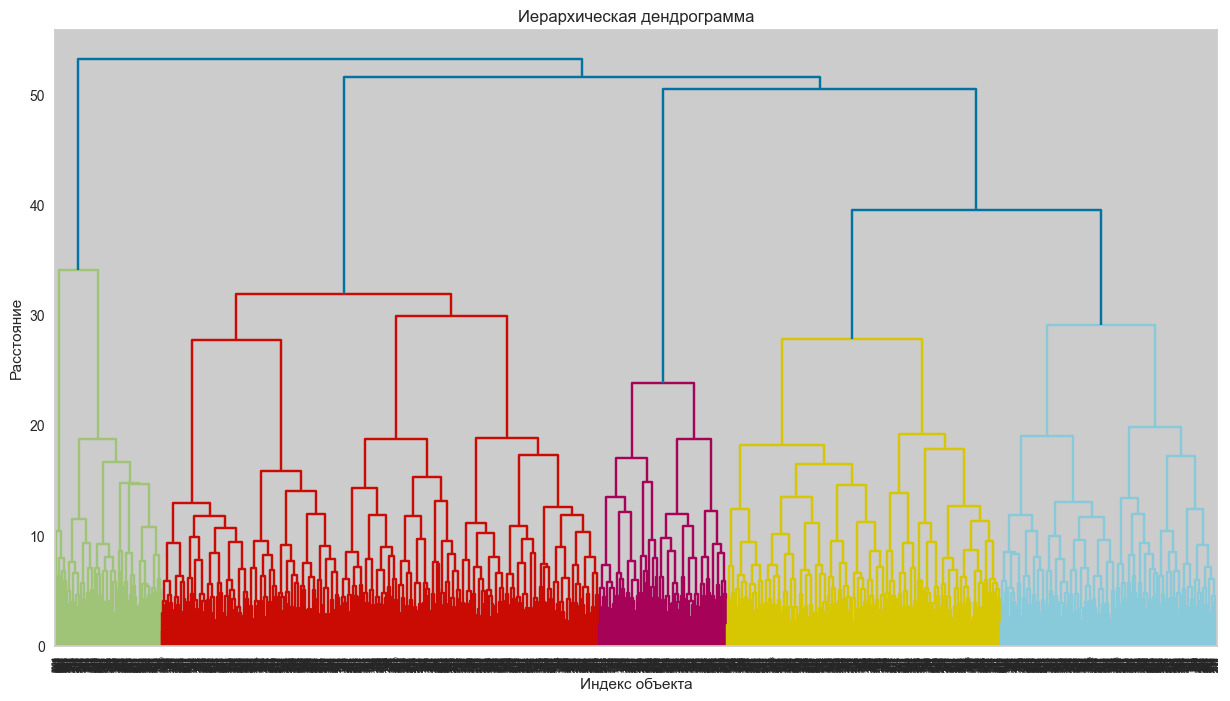

In [333]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(new_df, method='ward')

plt.figure(figsize=(15, 8))
plt.title('Иерархическая дендрограмма')
plt.xlabel('Индекс объекта')
plt.ylabel('Расстояние')

dendrogram(linkage_matrix, orientation='top') 

plt.show()

Обучение модели, подсчет средних показателей и размеры кластеров

In [334]:
OPTIMAL_K_HIER = 4
from sklearn.cluster import AgglomerativeClustering
# Обучение модели Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=OPTIMAL_K_HIER, linkage='ward')
cluster_labels_agg = agg_cluster.fit_predict(new_df)

# Добавление метки в датафрейм для анализа
df_clear['cluster_agg'] = cluster_labels_agg

# Подсчет среднего
cluster_means_agg = df_clear.groupby('cluster_agg').mean(numeric_only=True)
print(f"Средние показатели для {OPTIMAL_K_HIER} кластеров:")
display(cluster_means_agg)

# Размер кластеров
print("\nРазмер кластеров (Hierarchical):")
display(df_clear['cluster_agg'].value_counts())

Средние показатели для 4 кластеров:


,age,annual_income,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,Default,cluster_kmeans
cluster_agg,,,,,,,,,
0,57.390796,39775.915757,9206.098440,9.089332,48.833073,672.875195,4.595164,0.203588,3.680967
1,47.617857,43846.192857,26109.313571,10.764400,47.614286,666.867857,4.246429,0.414286,0.942857
2,35.157343,40521.918706,8747.947203,9.478792,45.618881,690.765734,4.742133,0.178322,2.866259
3,47.967164,88022.116418,10052.137313,9.508675,50.507463,692.946269,3.937313,0.116418,1.737313



Размер кластеров (Hierarchical):


cluster_agg
0    1282
2    1144
3     335
1     280
Name: count, dtype: int64

#### Выводы:

- Кластер 0: Возрастные, консервативные заемщики среднего риска.
- Характеристики: Возраст: 57.39 лет (самый возрастной). Доход: 39.7 тыс. Сумма кредита: 9.2 тыс. Кредитный рейтинг: 672.8 (ниже среднего). Уровень дефолта: 20.3% (средний). Доля в выборке: 1282 клиента (наибольший кластер).
- Вывод: Это крупнейший сегмент, состоящий из зрелых клиентов. Они демонстрируют консервативное поведение (низкие суммы кредитов), но их кредитный рейтинг и уровень дефолта указывают на умеренный риск. Вероятно, это клиенты, которые уже не стремятся к большим займам, но их финансовая устойчивость может быть невысокой.

- Кластер 1: Высокорисковые заемщики с экстремально высокой долговой нагрузкой.

- Характеристики: Возраст: 47.6 лет (средний). Доход: 43.8 тыс. Сумма кредита: 26.1 тыс. (экстремально высокая). Процентная ставка: 10.76% (самая высокая). Кредитный рейтинг: 666.8 (самый низкий). Уровень дефолта: 41.4% (критически высокий). Доля в выборке: 280 клиента (наименьший кластер).
- Вывод: Это самый опасный и рискованный кластер. Несмотря на средний доход, они берут кредиты, которые в 2–3 раза превышают средний размер займа в других кластерах. Сочетание самой низкой кредитной оценки, самой высокой ставки и критического уровня дефолта (каждый второй клиент в этом кластере склонен к дефолту) требует немедленного внимания риск-менеджмента.

- Кластер 2: Молодые, надежные и консервативные заемщики.

- Характеристики: Возраст: 35.15 лет (самый молодой). Доход: 40.5 тыс. Сумма кредита: 8.7 тыс. (самая низкая). Кредитный рейтинг: 690.7 (высокий). Уровень дефолта: 17.8% (ниже среднего). Доля в выборке: 1144 клиента (второй по величине).
- Вывод: Этот кластер представляет собой молодых, но финансово ответственных клиентов. Они берут самые маленькие кредиты и имеют высокий кредитный рейтинг, что делает их привлекательными. Низкий уровень дефолта и большой размер сегмента указывают на то, что это стабильная база для будущего роста банка.

- Кластер 3: Элитные заемщики с высоким доходом и низким риском.

- Характеристики: Возраст: 47.9 лет (средний). Доход: 88.0 тыс. (самый высокий). Сумма кредита: 10.0 тыс. Кредитный рейтинг: 692.9 (самый высокий). Уровень дефолта: 11.6% (самый низкий). Доля в выборке: 335 клиента (небольшой кластер).
- Вывод: Это наиболее ценный и надежный сегмент. Высокий доход и безупречный кредитный рейтинг обеспечивают минимальный риск дефолта. Несмотря на высокий доход, они берут умеренные суммы кредитов, что говорит о высокой финансовой дисциплине. Банку следует сосредоточиться на удержании и кросс-продажах для этой группы.


Подсчет внутренних и внешних метрик

In [335]:
# 1. Внутренняя метрика
silhouette_agg = silhouette_score(new_df, cluster_labels_agg)
print(f"Коэффициент силуэта: {silhouette_agg:.4f}")

# 2. Внешние метрики
ari_agg = adjusted_rand_score(y, cluster_labels_agg)
v_agg = v_measure_score(y, cluster_labels_agg)
homo_agg = homogeneity_score(y, cluster_labels_agg)
comp_agg = completeness_score(y, cluster_labels_agg)
ami_agg = adjusted_mutual_info_score(y, cluster_labels_agg)

print(f"ARI: {ari_agg:.4f}")
print(f"V-мера: {v_agg:.4f}")
print(f"Homogenity: {homo_agg:.4f}")
print(f"Completeness: {comp_agg:.4f}")
print(f"AMI: {ami_agg:.4f}")

Коэффициент силуэта: 0.0565
ARI: 0.0163
V-мера: 0.0167
Homogenity: 0.0281
Completeness: 0.0119
AMI: 0.0162


#### Выводы:
- Качество геометрии кластеров: Коэффициент силуэта - 0.0565
- Это чрезвычайно низкий показатель, очень близкий к 0. Вывод: Как и в K-Means, кластеры не имеют четких границ. Они сильно перекрываются, и объекты, по сути, находятся в "куче", а не в четких, обособленных группах.
- Бизнес-ценность кластеров. ARI (Adjusted Rand Index): 0.0163, AMI (Adjusted Mutual Information): 0.0162, V-мера (V-Measure): 0.0167
- Вывод: Все эти значения также критически близки к нулю. Это означает, что разбиение, которое нашел иерархический алгоритм, ничем не лучше случайного. Оно не имеет никакой связи с тем, станет клиент "дефолтным" или нет.
-Homogeneity (Однородность): 0.0281. Вывод: Очень низко. Кластеры "грязные". В каждом найденном кластере вперемешку лежат и надежные, и дефолтные клиенты.
- Completeness (Полнота): 0.0119. Вывод: Катастрофически низко. Это значит, что все "реальные" дефолтники "размазаны" по всем кластерам. Модель не смогла собрать их вместе.

## Выводы по работе:

### Общий вывод по кластеризации

Оба метода кластеризации (**K-Means** и **Иерархический**) показали неудовлетворительные результаты.

1.  **Критические метрики:** Все внешние метрики (ARI, AMI, V-Мера) близки к нулю (около 0.01 – 0.04), а Коэффициент силуэта крайне низок (0.05 – 0.07).
2.  **Интерпретация:** Это означает, что найденная структура кластеров почти не коррелирует с реальной целевой переменной Default. Кластеры не имеют четких границ и не позволяют надежно отличить дефолтного клиента от надежного.
3. Несмотря на плохие метрики, оба метода смогли выделить один сегмент критического риска (средний уровень дефолта 30% - 61%) — клиенты с самым низким кредитным рейтингом и самыми высокими суммами кредита.

### Целесообразность использования методов

Для задачи прогнозирования дефолта (оценки риска) ни один из методов кластеризации не является целесообразным.

В данном случае необходимо использовать обучение с учителем, которые целенаправленно обучаются предсказывать переменную Default.

- Метод K-means был бы более целесообразен, за счет скорости и масшатибруемости. В то время как Иерархический метод полезен только для исследовательского анализа на небольших выборках

Окончательный вывод: для оценки кредитного риска целесообразно перейти от методов кластеризации к моделям классификации.

#### Дополнительное задание №4

 Использовать SilhouetteVisualizer для разного количества кластеров и сравнить
результаты. Также использовать KElbowVisualizer и метрику silhouette . Сделать выводы

Сравнение SilhouetteVisualizer


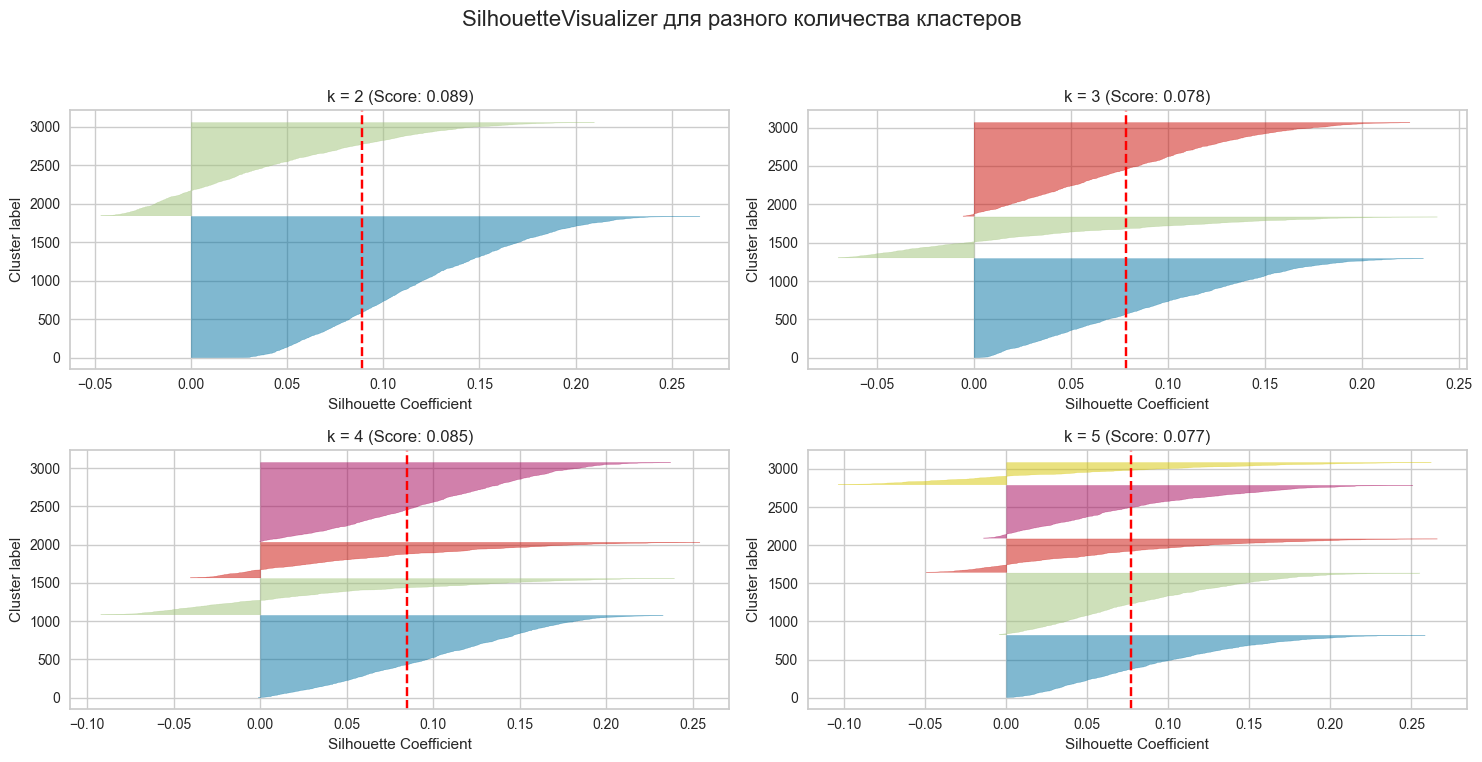


 KElbowVisualizer с метрикой силуэта


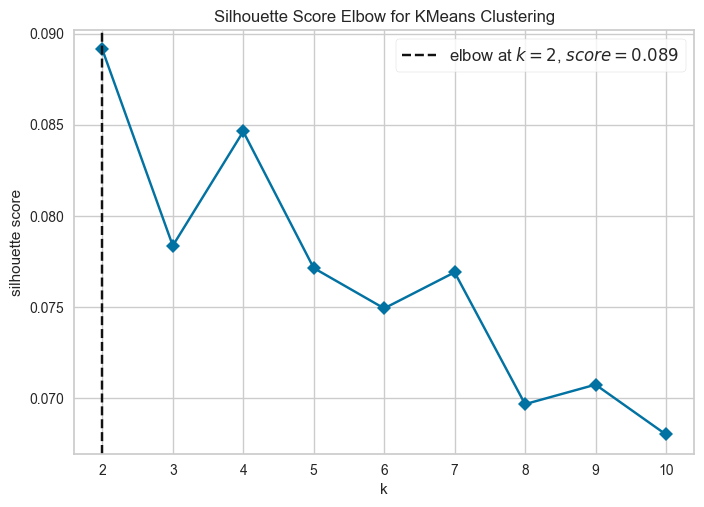

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [336]:
from yellowbrick.cluster import SilhouetteVisualizer

# Сравнение SilhouetteVisualizer для разных k
print("Сравнение SilhouetteVisualizer")
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('SilhouetteVisualizer для разного количества кластеров', fontsize=16)

# Диапазон k: от 2 до 5
for i in [2, 3, 4, 5]:
    # Создание модели K-Means с текущим k
    model = KMeans(i, random_state=42, n_init='auto')
    row = (i - 2) // 2
    col = (i - 2) % 2
    
    # Визуализация силуэта
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(new_df)
    visualizer.ax.set_title(f'k = {i} (Score: {visualizer.silhouette_score_:.3f})')
    visualizer.ax.set_xlabel("Silhouette Coefficient")
    visualizer.ax.set_ylabel("Cluster label")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# KElbowVisualizer с метрикой силуэта 
print("\n KElbowVisualizer с метрикой силуэта")
# Диапазон k от 2 до 10
model = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=False)

visualizer.fit(new_df)
visualizer.show()


Код состоит из 2 частией:
1. Сравнение SilhouetteVisualizer (k=2, 3, 4, 5). Этот блок кода выполняет детальный визуальный анализ для четырех конкретных значений `k` (от 2 до 5):

* Цель: Визуально сравнить качество кластеризации для каждого `k`.
* Процесс:
    *   Создается фигура с 4 графиками (2x2).
    *   В цикле для каждого `k` (2, 3, 4, 5) создается модель `KMeans` и инициализируется `SilhouetteVisualizer`.
    *   `SilhouetteVisualizer` строит график, где для каждого кластера показаны коэффициенты силуэта всех точек данных.
    *   На графике отображается*средний коэффициент силуэта (`Score`), который помогает определить, какое `k` обеспечивает наилучшее разделение.
* Интерпретация: Хорошее значение `k` должно иметь высокий средний коэффициент силуэта, а все кластеры должны быть равномерной толщины и превышать средний балл (вертикальная пунктирная линия).

2. KElbowVisualizer с метрикой силуэта. Этот блок кода автоматизирует поиск оптимального `k` в заданном диапазоне:

* Цель: Найти статистически лучшее значение `k` в диапазоне от 2 до 10.
* Процесс:
    *   Инициализируется `KElbowVisualizer` с диапазоном `k` от 2 до 10.
    *   В качестве метрики используется `'silhouette'` (вместо стандартной инерции/SSE).
    *   Визуализатор автоматически обучает модель `KMeans` для каждого `k` в диапазоне, вычисляет коэффициент силуэта и строит график.
* Интерпретация: Оптимальное количество кластеров (`k`) — это то, которое максимизирует коэффициент силуэта на графике.

#### Выводы по 4 доп. заданию: 
1. Оптимальное количество кластеров (k) — 2
Основной вывод, подтверждаемый обоими графиками заключается в том, что наилучшее количество кластеров для данного набора данных — k = 2.
- График "Silhouette Score Elbow" показывает, что при `k=2` достигается максимальный силуэтный коэффициент (0.089). Это является ключевым индикатором: чем выше значение силуэтного коэффициента, тем лучше разделение кластеров.

2. Анализ SilhouetteVisualizer подтверждает выбор k=2
- k = 2 (Score: 0.089):
  - Два кластера имеют примерно одинаковый размер (по оси Y).
  - Распределение силуэтных коэффициентов (ширина "силуэтов") достаточно широкое и смещено в положительную область, что говорит о хорошей внутренней согласованности кластеров.
  - Красная пунктирная линия (средний силуэтный коэффициент) находится на уровне ~0.1, что соответствует максимальному общему score.

- k = 3, 4, 5 (Score: 0.078, 0.085, 0.077):
  - При увеличении `k` средний силуэтный коэффициент снижается или остается ниже, чем при `k=2`.
  - Визуально видно, что при `k>2` появляются более узкие и менее четко выраженные кластеры, а также некоторые точки с отрицательными или близкими к нулю силуэтными коэффициентами — это указывает на неоптимальное разделение.
  - Особенно заметно при `k=5`, где один из кластеров (желтый) имеет очень маленький размер и низкую плотность, что свидетельствует о переобучении или искусственном дроблении данных.


- Итоговый вывод: Для данного набора данных оптимальное количество кластеров, определённое по силуэтному коэффициенту, равно 2. Этот выбор подтверждается как общей тенденцией на графике "Elbow", так и детальным анализом распределения силуэтных коэффициентов для каждого кластера. Использование большего числа кластеров (`k > 2`) приводит к снижению качества кластеризации и потенциальному переобучению.


#### Дополнительное задание №6

Выполнить подсчёт 4 любых метрик для разного количества кластеров (от 2 до
10). Построить график - по оси х - кол-во кластеров, по у - значение метрики
(отразить все 4 метрики на одном графике разным цветом).

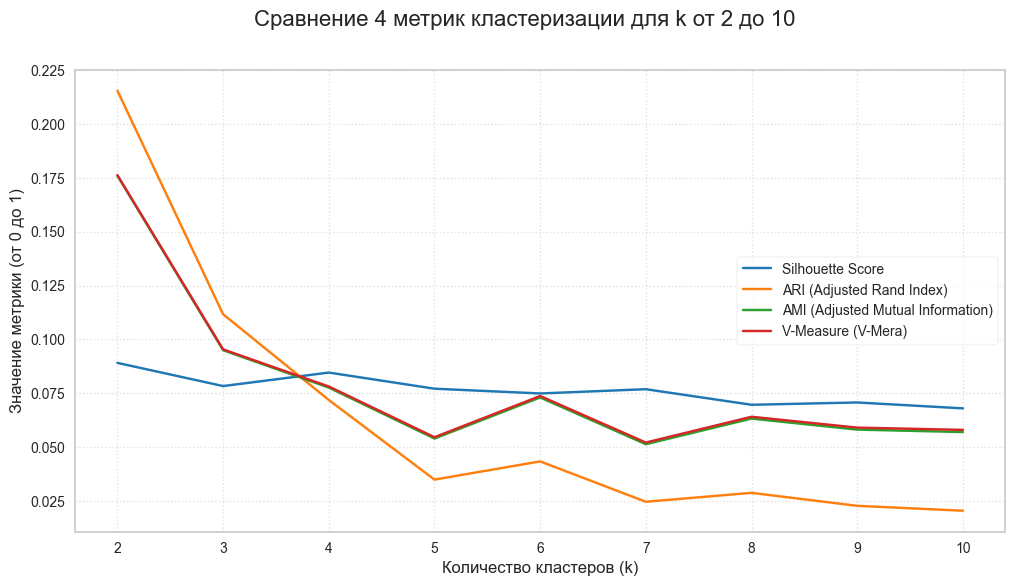

In [337]:
# Список для хранения результатов метрик
k_values = range(2, 11)
metrics = {
    'Silhouette Score': [],
    'ARI (Adjusted Rand Index)': [],
    'AMI (Adjusted Mutual Information)': [],
    'V-Measure (V-Mera)': []
}

for k in k_values:
    # Обучение модели
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(new_df)
    labels_pred = kmeans.labels_ # Полученные метки кластеров
    
    # 1. Silhouette Score 
    metrics['Silhouette Score'].append(silhouette_score(new_df, labels_pred))
    # 2. ARI 
    metrics['ARI (Adjusted Rand Index)'].append(adjusted_rand_score(y, labels_pred))
    # 3. AMI 
    metrics['AMI (Adjusted Mutual Information)'].append(adjusted_mutual_info_score(y, labels_pred))
    # 4. V-Measure
    metrics['V-Measure (V-Mera)'].append(v_measure_score(y, labels_pred))


# Построение графика 

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Сравнение 4 метрик кластеризации для k от 2 до 10', fontsize=16)

# Цвета для графиков
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 

i = 0
for name, values in metrics.items():
    ax.plot(k_values, values, 
            color=colors[i], 
            linestyle='-', 
            label=f'{name}')
    i += 1

# Настройки графика
ax.set_xlabel('Количество кластеров (k)', fontsize=12)
ax.set_ylabel('Значение метрики (от 0 до 1)', fontsize=12)
ax.set_xticks(k_values)
ax.grid(True, linestyle=':', alpha=0.6)
ax.legend(loc='right', frameon=True)

plt.show()


##### 1. Подготовка и Итерация (Цикл)
1.1 Инициализация: Определяется диапазон `k` (от 2 до 10) и словарь `metrics` для хранения результатов четырех метрик.

1.2 Цикл `for k in k_values`:
    *   На каждой итерации создается и обучается модель `KMeans` с текущим количеством кластеров `k` на данных `new_df`.
    *   Получаются предсказанные метки кластеров (`labels_pred`).
    *   Расчет метрик:
        *   Silhouette Score: Это внутренняя метрика. Она измеряет, насколько хорошо объект соответствует своему кластеру по сравнению с другими кластерами. Для расчета нужны только данные (`new_df`) и предсказанные метки (`labels_pred`).
        *   ARI, AMI, V-Measure: Это внешние метрики. Они сравнивают предсказанные метки (`labels_pred`) с истинными метками классов (`y`). Эти метрики показывают, насколько найденные кластеры соответствуют заранее известной структуре данных.
    *   Результаты каждой метрики добавляются в соответствующий список в словаре `metrics`.

##### 2. Визуализация
2.1 Построение графика: Создается один график, на котором отображаются результаты всех четырех метрик.

2.2 Отображение результатов: Код проходит по словарю `metrics` и строит отдельную линию для каждой метрики.

2.3 Анализ: Полученный график позволяет визуально определить, при каком значении `k` достигается наилучший результат по каждой из четырех метрик.


#### Выводы по 6 доп. заданию:

1. Анализ внутренней метрики (Коэффициент силуэта)
* Оптимальное $k$: Метрика достигает своего максимального значения при k = 2.
* После $k=2$ наблюдается переменное снижение и увеличение показателя через 1 кластер.

2. Анализ внешних метрик (ARI, AMI, V-Measure)
* ARI (Adjusted Rand Index, оранжевая линия): Эта метрика показывает, насколько скорректированная случайная вероятность совпадения меток кластеризации и меток `Default` выше нуля. Значения низкие (близки к 0) для всех $k$. Но лучшие показатели наблюдаются при k=2, там они выше в 2 раза, затем идет плавное снижение.
* AMI (Adjusted Mutual Information, зеленая линия): Измеряет скорректированную взаимную информацию между кластеризацией и `Default`. Значения также низкие (близки к 0). Максимальное значение также наблюдается при k=2, почти идеально совпадает с линией V-меры, после планомерно снижается и иногда чуть растет
* V-Мера (красная линия): Является гармоническим средним между полнотой (Homogeneity) и однородностью (Completeness). Значения также низкие (близки к 0). Аналогично с AMI

3. Итоговый вывод
1.  Оптимальный выбор: Наиболее обоснованным числом кластеров, согласно внутренней структуре данных (Silhouette Score), является k = 2.
2.  Значимость кластеров: Кластеризация успешно выявила сегменты, которые не являются прямым отражением бинарной переменной `Default`. Это полезно, поскольку сегменты (например, "Молодые и рискованные", "Пожилые и надежные") могут быть интерпретированы для принятия бизнес-решений, даже если они не идеально совпадают с меткой `Default`.

#### Дополнительное задание №7

Выполнить нормализацию данных с помощью MinMaxScaler, MaxAbsScaler и сравнить
полученные итоговые метрики с теми, что были получены на данных, нормализованных с помощью StandardScaler .

In [338]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler


num_cols = [
    'age', 'annual_income', 'loan_amount', 
    'interest_rate_pct', 'term_months', 
    'credit_score', 'num_open_accounts'
]
new_dataframe = df[num_cols]
y = df['Default'] 

# Словарь скалеров для итерации
scalers_map = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

# Словарь для сохранения результатов
results = {}

# Определяем оптимальное количество кластеров (на основе предыдущего анализа k=3)
optimal_k = 3

print(f"Сравнение методов масштабирования при k={optimal_k}:\n")

for name, scaler in scalers_map.items():
    # 1. Масштабирование данных
    X_scaled = scaler.fit_transform(new_dataframe)
    
    # 2. Обучение модели K-Means с оптимальным k
    # n_init='auto' выбирает лучший запуск автоматически
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto').fit(X_scaled)
    labels_pred = kmeans.labels_
    
    # 3. Расчет 4 метрик
    # Silhouette (внутренняя метрика)
    sil_score = silhouette_score(X_scaled, labels_pred)
    
    # Внешние метрики (требуют истинных меток y)
    ari_score = adjusted_rand_score(y, labels_pred)
    ami_score = adjusted_mutual_info_score(y, labels_pred)
    v_score = v_measure_score(y, labels_pred)
    
    results[name] = {
        'Silhouette Score': sil_score,
        'ARI': ari_score,
        'AMI': ami_score,
        'V-мера': v_score
    }

# 4. Вывод результатов в виде таблицы
results_df = pd.DataFrame(results).T
display(results_df)


Сравнение методов масштабирования при k=3:



,Silhouette Score,ARI,AMI,V-мера
StandardScaler,0.111836,-0.001875,0.010574,0.010995
MinMaxScaler,0.220615,-0.000371,0.001163,0.001575
MaxAbsScaler,0.186790,-0.000240,-0.000162,0.000253


#### 1. Подготовка данных и настройка

1. Выбор признаков: Определяется список `num_cols`, содержащий числовые признаки, которые будут использоваться для кластеризации (`new_dataframe`).
2. Истинные метки: Из исходного DataFrame извлекаются истинные метки классов (`y = df['Default']`). Наличие этих меток позволяет использовать внешние метрики для оценки качества.
3. Определение скалеров: Создается словарь `scalers_map`, содержащий объекты трех различных скалеров из `scikit-learn`.
4. Фиксация k: Устанавливается фиксированное количество кластеров `optimal_k = 3`. Это значение, предположительно, было выбрано как оптимальное на основе предыдущего анализа (например, с использованием метода локтя или силуэта).

#### 2. Сравнительный анализ (Цикл)

Код проходит циклом по каждому скалеру в `scalers_map`:

1. Масштабирование: Данные `new_dataframe` преобразуются с использованием текущего скалера (`X_scaled = scaler.fit_transform(...)`).
    * StandardScaler: Стандартизирует данные (среднее = 0, стандартное отклонение = 1).
    * MinMaxScaler: Нормализует данные в диапазон [0, 1].
    * MaxAbsScaler: Масштабирует данные в диапазон [-1, 1], сохраняя центровку на 0.
2. Кластеризация: Обучается модель `KMeans` с `n_clusters=3` на масштабированных данных (`X_scaled`).
3. Оценка: Рассчитываются четыре метрики для оценки качества кластеризации:
    * Silhouette Score: Внутренняя метрика. Оценивает плотность и разделение кластеров.
    * ARI, AMI, V-мера: Внешние метрики. Сравнивают предсказанные метки кластеров (`labels_pred`) с истинными метками классов (`y`). Эти метрики показывают, насколько хорошо кластеризация восстановила известную структуру данных.



#### Выводы по дополнительному заданию №7

1. Геометрическое качество кластеров (Silhouette Score):
* Лидер: `MinMaxScaler` показал наилучший результат ($0.22$), что почти в два раза выше, чем у `StandardScaler`.
* Вывод: Приведение данных к диапазону $[0, 1]$ (MinMaxScaler) или $[-1, 1]$ (MaxAbsScaler) позволило алгоритму K-Means сформировать более плотные и лучше разделенные геометрически группы, чем при стандартном $Z$-масштабировании.

2. Совпадение с истинными метками (ARI, AMI, V-мера):
* Общая картина: Все внешние метрики (ARI, AMI, V-мера) находятся около нуля. Это означает, что найденные кластеры практически не имеют ничего общего с реальными классами (с переменной `Default`). Разбиение случайно по отношению к целевой переменной.
* Сравнение: Несмотря на низкие значения, `StandardScaler` показал чуть более высокие значения AMI ($0.01$) и V-меры по сравнению с другими методами. Это говорит о том, что стандартизация сохранила немного больше информации о структуре распределения, которая хоть как-то коррелирует с исходными метками, но этого все равно недостаточно для качественной кластеризации.

##### Итоговый вывод:
1.  Лучший выбор для формы: Если цель — просто разбить данные на максимально непохожие друг на друга группы (без привязки к целевой переменной), то MinMaxScaler подходит лучше всего.
2.  Проблема метода/данных: Ни один из методов нормализации не позволил K-Means выявить структуру, соответствующую целевой переменной (ARI $\approx 0$). Это подтверждает, что для разделения клиентов на "дефолтных" и "надежных" простой кластеризации методом K-Means недостаточно